# Manipulando arquivos

Os arquivos são essenciais para qualquer tipo de programação, pois fornecem um meio de armazenar e recuperar dados. Através da manipulação de arquivos, podemos persistir os dados além da vida útil de um programa específico. O pyhton suporta criar códigos para arquivos, como abrir, ler, escrever e gerenciar arquivo, seja no formatos txt e csv.

Um arquivo é um container no computador onde as informações são armazenadas em formato digital. Existem dois tipos de arquivos que podemos manipular em Python: arquivos de texto e arquivos binários.


## Abrindo e Fechando Arquivos


Para manipular arquivos em Python, primeiro precisamos abri-los. Usamos a função ````open()```` para isso. Quando terminamos de trabalhar com o arquivo, usamos a função ````close()```` para liberar recusos.

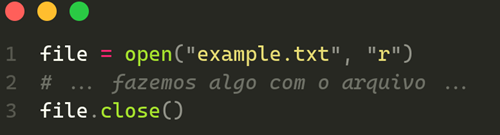

Modos de abertura de arquivo: Existem diferentes modos para abrir um arquivo, como somente leitura ('r'), gravação ('w') e anexar ('a'). O modo de abertura deve ser escolhido de acordo com a operação que iremos realizar no mesmo.

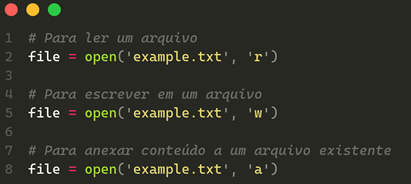


## Lendo Arquivos

Python fornece várias maneiras de ler um arquivo. Podemos usar ````read()````, ````readline()```` ou ````readlines()```` dependendo de nossas necessidades.

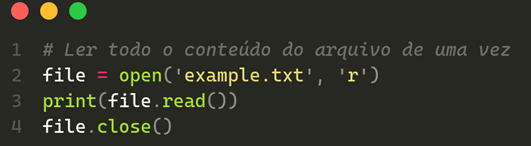

O método 'readline()' lê uma linha por vez, enquanto 'readlines()' retorna uma lista onde cada elemento é uma linha do arquivo.


## Escrevendo Arquivos

Podemos usar 'write()' ou 'writelines()' para escrever em um arquivo. Lembre-se, no entanto, de abrir o arquivo no modo correto.

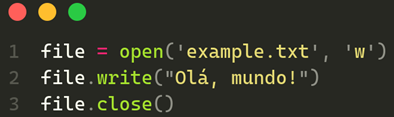

## Gerenciando arquivos e diretórios

Python também oferece funções para gerenciar arquivos e diretórios. Podemos criar, renomear e excluir arquivos e diretórios usando os módulos ````os```` e ````shutil````.

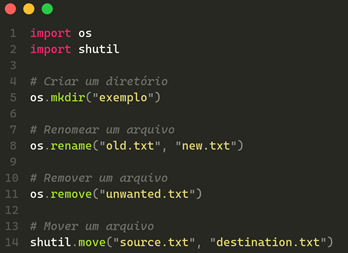

Para saber o caminho do diretório atual basta usar o comando: 
````  
    ROOT_PATH = Path(__file__).parent
````

In [26]:
import os, shutil
from pathlib import Path

# Obtém o diretório atual do notebook
ROOT_PATH = os.path.abspath('')
print(ROOT_PATH)

# Obtém o diretório atual do notebook
ROOT_PATH = Path().resolve().parent
print(ROOT_PATH)

c:\Users\je7560\Downloads\matheus\python-language\src\scripts
C:\Users\je7560\Downloads\matheus\python-language\src


In [28]:
arquivo = open(ROOT_PATH/'data'/'arquivo-text.txt','w')
arquivo.close()

In [29]:
os.rename(ROOT_PATH/'data'/'arquivo-text.txt', ROOT_PATH/'data'/'arquivo-test.txt')

## Tratamento de exceções

Tratar erros é uma parte importante da manipulação de arquivos. Python oferece uma variedade de exceções que nos permitem lidar com erros comuns.

Exceções mais comuns: 
- ***FileNotFoundError***: Lançada quando o arquivo que está sendo aberto não pode ser encontrado no diretório especificado.
- ***PermissionError***: Lançada quando ocorre uma tentativa de abrir um arquivo sem as permissões adequadas para leitura ou gravação
- ***IOError***: Lançada quando ocorre um erro geral de E/S (entrada/saída) ao trabalhar com o arquivo, como problemas de permissão, falta de espaço em disco, entre outros.
- ***UnicodeDecodeError***: Lançada quando ocorre um erro ao tentar decodificar os dados de um arquivo de texto usando uma codificação inadequada.
- ***UnicodeEncodeError***: Lançada quando ocorre um erro ao tentar codificar dados em uma determinada codificação ao gravar em um arquivo de texto.
- ***IsADirectoryError***: Lançada quando é feita uma tentativa de abrir um diretório em vez de um arquivo de texto.


 

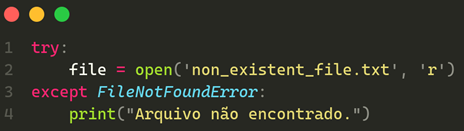

In [37]:
try:
    file = open("arquivo.txt",'r')
except FileNotFoundError as exc:
    print(f"Arquivo não encontrado {exc}")
except Exception:
    print(Exception)

Arquivo não encontrado [Errno 2] No such file or directory: 'arquivo.txt'


## Boas práticas 

Use o gerenciamento de contexto (context manager) com a declaração ````with````. O gerenciamento de contexto permite trabalhar com arquivos de forma segura, garantindo que eles sejam fechados corretamente, mesmo em caso de exceções.

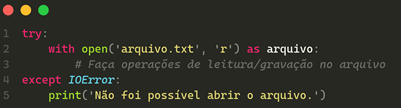

In [44]:
from pathlib import Path

# raiz do arquivo

ROOT_PATH = Path().resolve().parent
with open(ROOT_PATH/'data'/'arquivo-test.txt', "r") as arquivo:
    print(arquivo.read())

rerefs


Verifique se o arquivo foi aberto com sucesso: é recomendado verificar se o arquivo foi aberto corretamente antes de executar operações de leitura ou gravação nele.

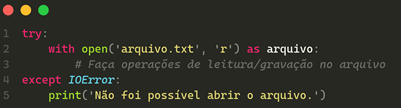


Use a codificação correta: certifique-se de usar a codificação correta ao ler ou gravar arquivos de texto. O argumento 'encoding' da função 'open()' permite especificar a codificação.

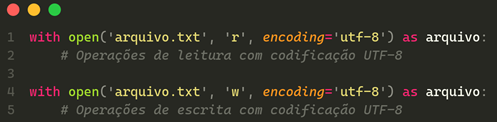

In [47]:
from pathlib import Path

ROOT_PATH = Path().resolve().parent

with open(ROOT_PATH/'data'/'arquivo-test.txt', "r",encoding='ascii') as arquivo:
    print(arquivo.read())


rerefs


## Trabalhando com arquivos CSV

Um formato de arquivo amplamente utilizado para armazenar dados tabulares. CSV é a sigla para 'Comma Separated Values'. Python fornece um módulo chamado 'csv' para lidar facilmente com arquivos CSV.

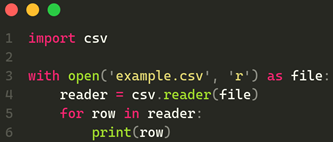

In [53]:
from pathlib import Path
import csv


ROOT_PATH = Path().resolve().parent
try:
    with open(ROOT_PATH/'data'/'arquivo-csv.csv', "w",encoding='utf-8',newline='') as arquivo:
        escritor = csv.writer(arquivo)
        escritor.writerow(['id', 'nome'])
        escritor.writerow(['1', 'maria'])
        escritor.writerow(['2', 'joao'])
except Exception:
    print(Exception)


Da mesma forma podemos utilizar o módulo 'csv' para escrever em arquivos CSV.

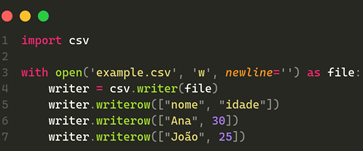

In [54]:
from pathlib import Path
import csv


ROOT_PATH = Path().resolve().parent
try:
    with open(ROOT_PATH/'data'/'arquivo-csv.csv', "r",encoding='utf-8',newline='') as arquivo:
        leitor = csv.reader(arquivo)
        for row in leitor:
            print(row)
except Exception:
    print(Exception)


['id', 'nome']
['1', 'maria']
['2', 'joao']


Práticas recomendadas:
- Usar csv.reader e csv.writer para manipular arquivos CSV.
- Fazer o tratamento correto das exceções.
- Ao gravar arquivos CSV definir o argumento newline='' no método 'open'.
